In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
# Generate the dataset
np.random.seed(42)
X = np.linspace(-np.pi, np.pi, 100)
y = np.cos(X) + np.random.normal(0, 0.1, X.shape)


# Convert to DataFrame
data = pd.DataFrame({
    'X': X,
    'y': y
})

data.head()

,X,y
0,-3.141593,-0.950329
1,-3.078126,-1.011813
2,-3.014660,-0.927186
3,-2.951193,-0.829626
4,-2.887727,-0.991364


In [16]:
X = X.reshape(-1,1)
poly_transformer = PolynomialFeatures(degree=50)
X_poly_sklearn = poly_transformer.fit_transform(X)

In [11]:
# df_poly_sklearn = pd.DataFrame(X_poly_sklearn, columns=["bias", "X", "X^2", "X^3"])
# df_poly_sklearn['y'] = y

In [12]:
# df_poly_sklearn

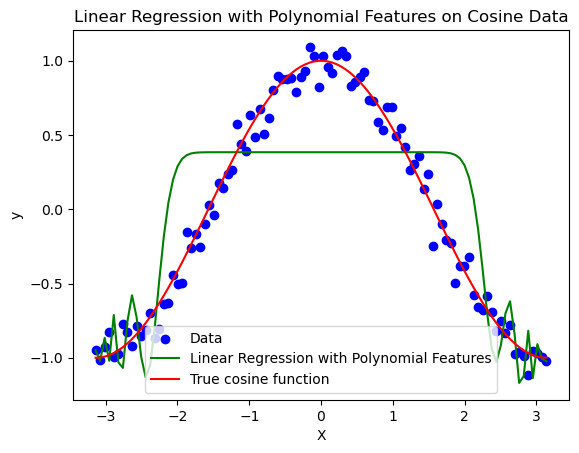

In [17]:
# Fitting Linear Regression with polynomial features
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_poly_sklearn, y)

# Making predictions
y_pred_poly = lin_reg_poly.predict(X_poly_sklearn)

# Plotting the results
plt.scatter(X, y, c='b', label="Data")
plt.plot(X, y_pred_poly, c='g', label="Linear Regression with Polynomial Features")
plt.plot(X, np.cos(X), c='r', label="True cosine function")
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression with Polynomial Features on Cosine Data')
plt.legend()
plt.show()

# With 2 features

In [19]:
# Generating artificial data for Z (sine function with noise)
Z = np.sin(X) + np.random.normal(0, 0.1, X.shape)

In [22]:
X.shape, Z.shape, y.shape

((100, 1), (100, 1), (100,))

In [24]:
# Creating a DataFrame for visualization
data_2d = pd.DataFrame(data=np.hstack([X, Z, y.reshape(-1,1)]), columns=["X", "Z", "y"])
data_2d.head()

,X,Z,y
0,-3.141593,0.139936,-0.950329
1,-3.078126,0.029039,-1.011813
2,-3.014660,-0.120629,-0.927186
3,-2.951193,-0.253945,-0.829626
4,-2.887727,-0.181326,-0.991364


In [25]:
# Creating polynomial features for X and Z
X_2d = data_2d[['X', 'Z']].values

poly_transformer_2d = PolynomialFeatures(degree=3)
X_poly_2d = poly_transformer_2d.fit_transform(X_2d)

In [33]:
poly_transformer_2d.get_feature_names()

['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2', 'x0^3', 'x0^2 x1', 'x0 x1^2', 'x1^3']

In [36]:
# Creating polynomial features for X and Z
X_2d = data_2d[['X', 'Z']].values
poly_transformer_2d = PolynomialFeatures(degree=3, interaction_only=True)
X_poly_2d = poly_transformer_2d.fit_transform(X_2d)

# Convert the features into a DataFrame for visualization
df_poly_2d = pd.DataFrame(X_poly_2d, columns=poly_transformer_2d.get_feature_names())
df_poly_2d['y'] = y

# Displaying the first few rows of the DataFrame with polynomial features
df_poly_2d.head()


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,1,x0,x1,x0 x1,y
0,1.0,-3.141593,0.139936,-0.439620,-0.950329
1,1.0,-3.078126,0.029039,-0.089387,-1.011813
2,1.0,-3.014660,-0.120629,0.363657,-0.927186
3,1.0,-2.951193,-0.253945,0.749441,-0.829626
4,1.0,-2.887727,-0.181326,0.523619,-0.991364


# Polynomial Regression with Logistic Regression

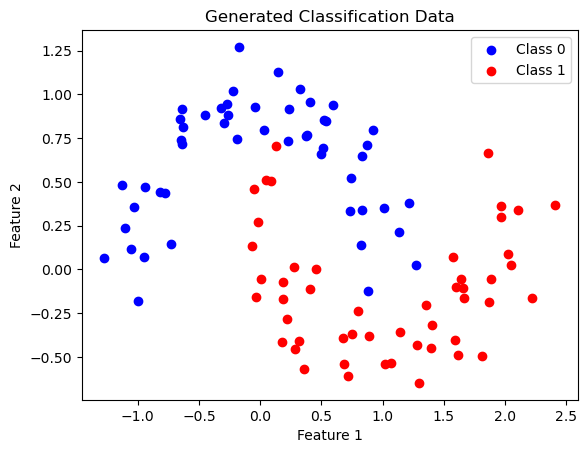

In [38]:
from sklearn.datasets import make_moons

# Generating classification data
X_class, y_class = make_moons(n_samples=100, noise=0.15, random_state=42)

# Plotting the data
plt.scatter(X_class[y_class == 0][:, 0], X_class[y_class == 0][:, 1], c='b', label='Class 0')
plt.scatter(X_class[y_class == 1][:, 0], X_class[y_class == 1][:, 1], c='r', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Generated Classification Data')
plt.legend()
plt.show()


In [45]:
# Creating polynomial features for the classification data
poly_transformer_class = PolynomialFeatures(degree=20, include_bias=False)
X_poly_class = poly_transformer_class.fit_transform(X_class)

# Convert the features into a DataFrame for visualization
df_poly_class = pd.DataFrame(X_poly_class, columns=poly_transformer_class.get_feature_names(['X1', 'X2']))
df_poly_class['y'] = y_class

# Displaying the first few rows of the DataFrame with polynomial features
df_poly_class.head()


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,X1,X2,X1^2,X1 X2,X2^2,X1^3,X1^2 X2,X1 X2^2,X2^3,X1^4,...,X1^8 X2^12,X1^7 X2^13,X1^6 X2^14,X1^5 X2^15,X1^4 X2^16,X1^3 X2^17,X1^2 X2^18,X1 X2^19,X2^20,y
0,1.613838,-0.491151,2.604474,-0.792638,0.241229,4.203200,-1.279190,0.389305,-0.118480,6.783286,...,9.066907e-03,-2.759396e-03,8.397866e-04,-2.555782e-04,7.778193e-05,-2.367193e-05,7.204245e-06,-2.192519e-06,6.672648e-07,1
1,0.089847,0.504391,0.008073,0.045318,0.254410,0.000725,0.004072,0.022858,0.128322,0.000065,...,1.151439e-12,6.464028e-12,3.628821e-11,2.037172e-10,1.143642e-09,6.420255e-09,3.604247e-08,2.023377e-07,1.135897e-06,1
2,0.747210,-0.369111,0.558323,-0.275804,0.136243,0.417185,-0.206083,0.101802,-0.050289,0.311725,...,6.214835e-07,-3.070039e-07,1.516555e-07,-7.491561e-08,3.700723e-08,-1.828103e-08,9.030566e-09,-4.460969e-09,2.203654e-09,1
3,-1.101745,0.236856,1.213842,-0.260955,0.056101,-1.337345,0.287506,-0.061809,0.013288,1.473413,...,6.768164e-08,-1.455040e-08,3.128087e-09,-6.724854e-10,1.445729e-10,-3.108071e-11,6.681822e-12,-1.436478e-12,3.088182e-13,0
4,-0.728715,0.146523,0.531025,-0.106774,0.021469,-0.386966,0.077808,-0.015645,0.003146,0.281987,...,7.786563e-12,-1.565653e-12,3.148077e-13,-6.329874e-14,1.272755e-14,-2.559143e-15,5.145698e-16,-1.034651e-16,2.080385e-17,0


In [46]:
from sklearn.linear_model import LogisticRegression

# Fitting Logistic Regression with polynomial features
log_reg_poly = LogisticRegression(solver='lbfgs')
log_reg_poly.fit(X_poly_class, y_class)

LogisticRegression()

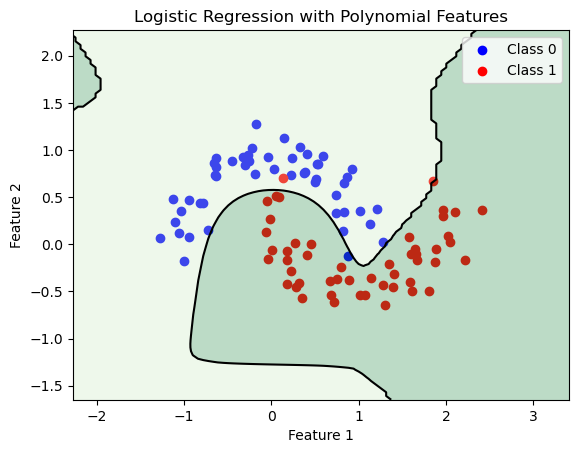

In [47]:
# Plotting the decision boundary
x1_min, x1_max = X_class[:, 0].min() - 1, X_class[:, 0].max() + 1
x2_min, x2_max = X_class[:, 1].min() - 1, X_class[:, 1].max() + 1

xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 100), np.linspace(x2_min, x2_max, 100))
X_grid = np.c_[xx1.ravel(), xx2.ravel()]
X_grid_poly = poly_transformer_class.transform(X_grid)
probs = log_reg_poly.predict_proba(X_grid_poly)[:, 1].reshape(xx1.shape)

plt.scatter(X_class[y_class == 0][:, 0], X_class[y_class == 0][:, 1], c='b', label='Class 0')
plt.scatter(X_class[y_class == 1][:, 0], X_class[y_class == 1][:, 1], c='r', label='Class 1')
plt.contourf(xx1, xx2, probs, levels=[0, 0.5, 1], alpha=0.3, cmap='Greens')
plt.contour(xx1, xx2, probs, levels=[0.5], colors='black')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression with Polynomial Features')
plt.legend()
plt.show()